# 导入数据

In [1]:
import json
import pandas as pd

with open(r'F:\suya\ClueDataExport-2022-03-11.cluedata', 'r') as f:
    content = f.read()
    # print(content)
    ls = json.loads(content)['data']
    df = pd.DataFrame.from_dict(ls, orient='columns')
df.head()

,postpartum_mood,nursing,sex,exercise,marks_pregnancy_cycle,pelvis_and_bladder,digestion,postpartum_supplements,postpartum_bleeding,sleep_quality,...,medication,pregnancy_breasts,craving,poop,bodily_changes,hair,energy,pregnancy_superpowers,sleep,birth_control
0,[],[],[],[],False,[],[],[],[],[],...,[],[],[],[],[],[],[],[],NaN,NaN
1,[],[],[],[],False,[],[],[],[],[],...,[],[],[],[],[],[],[],[],NaN,NaN
2,[],[],[],[],False,[],[],[],[],[],...,[],[],[],[],[],[],[],[],NaN,NaN
3,[],[],[],[],False,[],[],[],[],[],...,[],[],[],[],[],[],[],[],NaN,NaN
4,[],[],[],[],False,[],[],[],[],[],...,[],[],[],[],[],[],[],[],3_to_6_hours,NaN


# 找出所关心的列

In [3]:
df.describe()

,postpartum_mood,nursing,sex,exercise,marks_pregnancy_cycle,pelvis_and_bladder,digestion,postpartum_supplements,postpartum_bleeding,sleep_quality,...,medication,pregnancy_breasts,craving,poop,bodily_changes,hair,energy,pregnancy_superpowers,sleep,birth_control
count,227,227,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,227,28,1
unique,1,1,7,1,1,1,1,1,1,1,...,1,1,1,1,1,1,4,1,3,1
top,[],[],[],[],False,[],[],[],[],[],...,[],[],[],[],[],[],[],[],6_to_9_hours,"{'type': 'none', 'timezone_id': 'Asia/Shanghai'}"
freq,227,227,209,227,227,227,227,227,227,227,...,227,227,227,227,227,227,215,227,21,1


In [14]:
df_desc=df.describe().T
df_desc

,count,unique,top,freq
postpartum_mood,227,1,[],227
nursing,227,1,[],227
sex,227,7,[],209
exercise,227,1,[],227
marks_pregnancy_cycle,227,1,False,227
pelvis_and_bladder,227,1,[],227
digestion,227,1,[],227
postpartum_supplements,227,1,[],227
postpartum_bleeding,227,1,[],227
sleep_quality,227,1,[],227


In [25]:
columns_care=list(df_desc.loc[(df_desc.unique!=1) & (df_desc.unique!=0)].index)

# 准备数据

In [109]:
df_cut = df[columns_care]
df_cut

,sex,ailment,pain,mood,period,tags,day,energy,sleep
0,[],[],[],[],heavy,[],2018-03-06T00:00:00Z,[],NaN
1,[],[],[],[],medium,[],2018-03-07T00:00:00Z,[],NaN
2,[],[],[],[],light,[],2018-03-08T00:00:00Z,[],NaN
3,[],[],[],[],spotting,[],2018-03-09T00:00:00Z,[],NaN
4,[],[],[],[sensitive],heavy,[],2018-04-08T00:00:00Z,[],3_to_6_hours
...,...,...,...,...,...,...,...,...,...
222,[],[],[],[],heavy,[],2022-02-18T00:00:00Z,[low_energy],6_to_9_hours
223,[],[],[],[],heavy,[],2022-02-19T00:00:00Z,[],NaN
224,[],[],[],[],light,[],2022-02-20T00:00:00Z,[],NaN
225,[],[],[],[],spotting,[],2022-02-21T00:00:00Z,[],NaN


In [110]:
from datetime import datetime
df_cut.index= df['day'].apply(lambda x :x[:10]).astype('datetime64')
df_cut

,sex,ailment,pain,mood,period,tags,day,energy,sleep
day,,,,,,,,,
2018-03-06,[],[],[],[],heavy,[],2018-03-06T00:00:00Z,[],NaN
2018-03-07,[],[],[],[],medium,[],2018-03-07T00:00:00Z,[],NaN
2018-03-08,[],[],[],[],light,[],2018-03-08T00:00:00Z,[],NaN
2018-03-09,[],[],[],[],spotting,[],2018-03-09T00:00:00Z,[],NaN
2018-04-08,[],[],[],[sensitive],heavy,[],2018-04-08T00:00:00Z,[],3_to_6_hours
...,...,...,...,...,...,...,...,...,...
2022-02-18,[],[],[],[],heavy,[],2022-02-18T00:00:00Z,[low_energy],6_to_9_hours
2022-02-19,[],[],[],[],heavy,[],2022-02-19T00:00:00Z,[],NaN
2022-02-20,[],[],[],[],light,[],2022-02-20T00:00:00Z,[],NaN


In [111]:
def period2num(x):
    if x == 'spotting':
        return 1
    elif x == 'light':
        return 2
    elif x == 'medium':
        return 3
    elif x == 'heavy':
        return 4


df_cut['period_num'] = df_cut['period'].apply(period2num)
df_cut

D:\ProgramData\anaconda3\envs\ml37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,sex,ailment,pain,mood,period,tags,day,energy,sleep,period_num
day,,,,,,,,,,
2018-03-06,[],[],[],[],heavy,[],2018-03-06T00:00:00Z,[],NaN,4.0
2018-03-07,[],[],[],[],medium,[],2018-03-07T00:00:00Z,[],NaN,3.0
2018-03-08,[],[],[],[],light,[],2018-03-08T00:00:00Z,[],NaN,2.0
2018-03-09,[],[],[],[],spotting,[],2018-03-09T00:00:00Z,[],NaN,1.0
2018-04-08,[],[],[],[sensitive],heavy,[],2018-04-08T00:00:00Z,[],3_to_6_hours,4.0
...,...,...,...,...,...,...,...,...,...,...
2022-02-18,[],[],[],[],heavy,[],2022-02-18T00:00:00Z,[low_energy],6_to_9_hours,4.0
2022-02-19,[],[],[],[],heavy,[],2022-02-19T00:00:00Z,[],NaN,4.0
2022-02-20,[],[],[],[],light,[],2022-02-20T00:00:00Z,[],NaN,2.0


In [ ]:
df_cut.to_excel(r'f:\clue.xlsx')

# 填补日期

In [79]:
df_cut

,sex,ailment,pain,mood,period,tags,day,energy,sleep,period_num
day,,,,,,,,,,
2018-03-06,[],[],[],[],heavy,[],2018-03-06T00:00:00Z,[],NaN,4.0
2018-03-07,[],[],[],[],medium,[],2018-03-07T00:00:00Z,[],NaN,3.0
2018-03-08,[],[],[],[],light,[],2018-03-08T00:00:00Z,[],NaN,2.0
2018-03-09,[],[],[],[],spotting,[],2018-03-09T00:00:00Z,[],NaN,1.0
2018-04-08,[],[],[],[sensitive],heavy,[],2018-04-08T00:00:00Z,[],3_to_6_hours,4.0
...,...,...,...,...,...,...,...,...,...,...
2022-02-18,[],[],[],[],heavy,[],2022-02-18T00:00:00Z,[low_energy],6_to_9_hours,4.0
2022-02-19,[],[],[],[],heavy,[],2022-02-19T00:00:00Z,[],NaN,4.0
2022-02-20,[],[],[],[],light,[],2022-02-20T00:00:00Z,[],NaN,2.0


In [80]:
min_date = df_cut.index.min()
max_date = df_cut.index.max()
date_list = pd.date_range(min_date, max_date, freq="D")
date_list

DatetimeIndex(['2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09',
               '2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15',
               ...
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22'],
              dtype='datetime64[ns]', length=1450, freq='D')

In [85]:
df_cut_fill = df_cut.reindex(date_list)
df_cut_fill

,sex,ailment,pain,mood,period,tags,day,energy,sleep,period_num
2018-03-06,[],[],[],[],heavy,[],2018-03-06T00:00:00Z,[],NaN,4.0
2018-03-07,[],[],[],[],medium,[],2018-03-07T00:00:00Z,[],NaN,3.0
2018-03-08,[],[],[],[],light,[],2018-03-08T00:00:00Z,[],NaN,2.0
2018-03-09,[],[],[],[],spotting,[],2018-03-09T00:00:00Z,[],NaN,1.0
2018-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-02-18,[],[],[],[],heavy,[],2022-02-18T00:00:00Z,[low_energy],6_to_9_hours,4.0
2022-02-19,[],[],[],[],heavy,[],2022-02-19T00:00:00Z,[],NaN,4.0
2022-02-20,[],[],[],[],light,[],2022-02-20T00:00:00Z,[],NaN,2.0
2022-02-21,[],[],[],[],spotting,[],2022-02-21T00:00:00Z,[],NaN,1.0


In [91]:
df_cut_fill.iloc[:50,:]

,sex,ailment,pain,mood,period,tags,day,energy,sleep,period_num
2018-03-06,[],[],[],[],heavy,[],2018-03-06T00:00:00Z,[],NaN,4.0
2018-03-07,[],[],[],[],medium,[],2018-03-07T00:00:00Z,[],NaN,3.0
2018-03-08,[],[],[],[],light,[],2018-03-08T00:00:00Z,[],NaN,2.0
2018-03-09,[],[],[],[],spotting,[],2018-03-09T00:00:00Z,[],NaN,1.0
2018-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

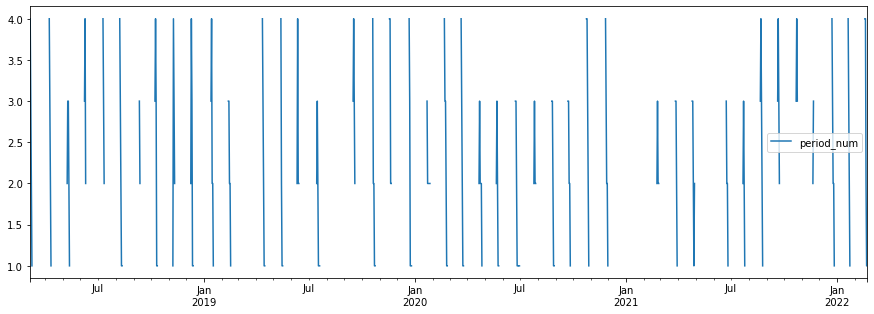

In [87]:
df_cut_fill[['period_num']].plot(figsize=(15,5))

# 数据查看

In [112]:
df_cut

,sex,ailment,pain,mood,period,tags,day,energy,sleep,period_num
day,,,,,,,,,,
2018-03-06,[],[],[],[],heavy,[],2018-03-06T00:00:00Z,[],NaN,4.0
2018-03-07,[],[],[],[],medium,[],2018-03-07T00:00:00Z,[],NaN,3.0
2018-03-08,[],[],[],[],light,[],2018-03-08T00:00:00Z,[],NaN,2.0
2018-03-09,[],[],[],[],spotting,[],2018-03-09T00:00:00Z,[],NaN,1.0
2018-04-08,[],[],[],[sensitive],heavy,[],2018-04-08T00:00:00Z,[],3_to_6_hours,4.0
...,...,...,...,...,...,...,...,...,...,...
2022-02-18,[],[],[],[],heavy,[],2022-02-18T00:00:00Z,[low_energy],6_to_9_hours,4.0
2022-02-19,[],[],[],[],heavy,[],2022-02-19T00:00:00Z,[],NaN,4.0
2022-02-20,[],[],[],[],light,[],2022-02-20T00:00:00Z,[],NaN,2.0


In [113]:
df_cut.dtypes

sex            object
ailment        object
pain           object
mood           object
period         object
tags           object
day            object
energy         object
sleep          object
period_num    float64
dtype: object

In [129]:
df_cut.iloc[:50,:]

,sex,ailment,pain,mood,period,tags,day,energy,sleep,period_num
day,,,,,,,,,,
2018-03-06,[],[],[],[],heavy,[],2018-03-06T00:00:00Z,[],NaN,4.0
2018-03-07,[],[],[],[],medium,[],2018-03-07T00:00:00Z,[],NaN,3.0
2018-03-08,[],[],[],[],light,[],2018-03-08T00:00:00Z,[],NaN,2.0
2018-03-09,[],[],[],[],spotting,[],2018-03-09T00:00:00Z,[],NaN,1.0
2018-04-08,[],[],[],[sensitive],heavy,[],2018-04-08T00:00:00Z,[],3_to_6_hours,4.0
2018-04-09,[],[],[],[],medium,[],2018-04-09T00:00:00Z,[],3_to_6_hours,3.0
2018-04-10,[],[],[],[],light,[],2018-04-10T00:00:00Z,[],6_to_9_hours,2.0
2018-04-11,[],[],[],[],spotting,[],2018-04-11T00:00:00Z,[],6_to_9_hours,1.0
2018-04-15,[],[],[],[],NaN,[],2018-04-15T00:00:00Z,[],NaN,NaN


## 每月的量

In [192]:
df_group = df_cut.groupby([
    pd.to_datetime(df_cut['day']).dt.year,
    pd.to_datetime(df_cut['day']).dt.month
]).agg({'period_num': sum})

In [193]:
df_group

period_num
day  day            
2018 3          10.0
     4          10.0
     5          11.0
     6          10.0
     7           9.0
     8          11.0
     9           5.0
     10         12.0
     11         10.0
     12         11.0
2019 1          12.0
     2          11.0
     3           4.0
     4          11.0
     5           8.0
     6          10.0
     7          10.0
     8           4.0
     9          13.0
     10         10.0
     11         12.0
     12         10.0
2020 1          13.0
     2          14.0
     3          11.0
     4          12.0
     5           9.0
     6          12.0
     7           9.0
     8          10.0
     9          11.0
     10         14.0
     11         12.0
     12          3.0
2021 1           2.0
     2           9.0
     3           9.0
     4          11.0
     5           3.0
     6          10.0
     7           8.0
     8          13.0
     9          12.0
     10         10.0
     11          5.0
     12         12.0
2022 1          10.0
     2          12.0

In [132]:
df_group.index

MultiIndex([(2018,  3),
            (2018,  4),
            (2018,  5),
            (2018,  6),
            (2018,  7),
            (2018,  8),
            (2018,  9),
            (2018, 10),
            (2018, 11),
            (2018, 12),
            (2019,  1),
            (2019,  2),
            (2019,  3),
            (2019,  4),
            (2019,  5),
            (2019,  6),
            (2019,  7),
            (2019,  8),
            (2019,  9),
            (2019, 10),
            (2019, 11),
            (2019, 12),
            (2020,  1),
            (2020,  2),
            (2020,  3),
            (2020,  4),
            (2020,  5),
            (2020,  6),
            (2020,  7),
            (2020,  8),
            (2020,  9),
            (2020, 10),
            (2020, 11),
            (2020, 12),
            (2021,  1),
            (2021,  2),
            (2021,  3),
            (2021,  4),
            (2021,  5),
            (2021,  6),
            (2021,  7),
            (202

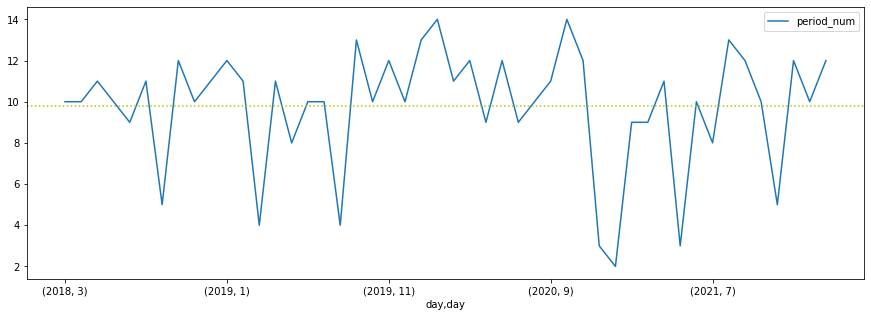

In [194]:
df_group.plot(figsize=(15,5))
import matplotlib.pyplot as plt
plt.axhline(y=9.791667,color='y',ls=':')

In [195]:
df_group.describe()

,period_num
count,48.000000
mean,9.791667
std,2.909693
min,2.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,14.000000


去除异常点看看：

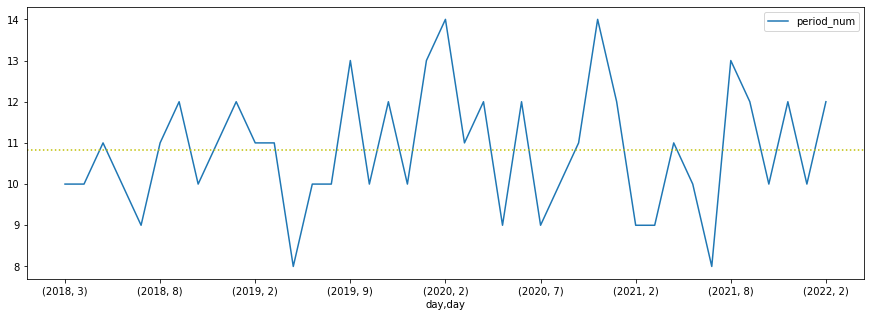

In [200]:
df_group_normal = df_group[df_group['period_num'] > 6]

df_group_normal.plot(figsize=(15, 5))
import matplotlib.pyplot as plt

plt.axhline(y=10.829268, color='y', ls=':')

In [199]:
df_group_normal.describe()

,period_num
count,41.000000
mean,10.829268
std,1.481594
min,8.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,14.000000


## 周期

In [201]:
df_cut

,sex,ailment,pain,mood,period,tags,day,energy,sleep,period_num
day,,,,,,,,,,
2018-03-06,[],[],[],[],heavy,[],2018-03-06T00:00:00Z,[],NaN,4.0
2018-03-07,[],[],[],[],medium,[],2018-03-07T00:00:00Z,[],NaN,3.0
2018-03-08,[],[],[],[],light,[],2018-03-08T00:00:00Z,[],NaN,2.0
2018-03-09,[],[],[],[],spotting,[],2018-03-09T00:00:00Z,[],NaN,1.0
2018-04-08,[],[],[],[sensitive],heavy,[],2018-04-08T00:00:00Z,[],3_to_6_hours,4.0
...,...,...,...,...,...,...,...,...,...,...
2022-02-18,[],[],[],[],heavy,[],2022-02-18T00:00:00Z,[low_energy],6_to_9_hours,4.0
2022-02-19,[],[],[],[],heavy,[],2022-02-19T00:00:00Z,[],NaN,4.0
2022-02-20,[],[],[],[],light,[],2022-02-20T00:00:00Z,[],NaN,2.0


In [213]:
df_group2 = df_cut.groupby([
    pd.to_datetime(df_cut['day']).dt.year,
    pd.to_datetime(df_cut['day']).dt.month
]).apply(lambda x: x.sort_values('period_num', ascending=False))
df_group2

sex ailment pain         mood    period tags  \
day  day day                                                       
2018 3   2018-03-06  []      []   []           []     heavy   []   
         2018-03-07  []      []   []           []    medium   []   
         2018-03-08  []      []   []           []     light   []   
         2018-03-09  []      []   []           []  spotting   []   
     4   2018-04-08  []      []   []  [sensitive]     heavy   []   
...                  ..     ...  ...          ...       ...  ...   
2022 2   2022-02-18  []      []   []           []     heavy   []   
         2022-02-19  []      []   []           []     heavy   []   
         2022-02-20  []      []   []           []     light   []   
         2022-02-21  []      []   []           []  spotting   []   
         2022-02-22  []      []   []           []  spotting   []   

                                      day        energy         sleep  \
day  day day                                                            
2018 3   2018-03-06  2018-03-06T00:00:00Z            []           NaN   
         2018-03-07  2018-03-07T00:00:00Z            []           NaN   
         2018-03-08  2018-03-08T00:00:00Z            []           NaN   
         2018-03-09  2018-03-09T00:00:00Z            []           NaN   
     4   2018-04-08  2018-04-08T00:00:00Z            []  3_to_6_hours   
...                                   ...           ...           ...   
2022 2   2022-02-18  2022-02-18T00:00:00Z  [low_energy]  6_to_9_hours   
         2022-02-19  2022-02-19T00:00:00Z            []           NaN   
         2022-02-20  2022-02-20T00:00:00Z            []           NaN   
         2022-02-21  2022-02-21T00:00:00Z            []           NaN   
         2022-02-22  2022-02-22T00:00:00Z            []           NaN   

                     period_num  
day  day day                     
2018 3   2018-03-06         4.0  
         2018-03-07         3.0  
         2018-03-08         2.0  
         2018-03-09         1.0  
     4   2018-04-08         4.0  
...                         ...  
2022 2   2022-02-18         4.0  
         2022-02-19         4.0  
         2022-02-20         2.0  
         2022-02-21         1.0  
         2022-02-22         1.0  

[227 rows x 10 columns]

In [215]:
df_group2['month'] = df_group2['day'].astype('str').apply(lambda x: x[:7])
df_group2

sex ailment pain         mood    period tags  \
day  day day                                                       
2018 3   2018-03-06  []      []   []           []     heavy   []   
         2018-03-07  []      []   []           []    medium   []   
         2018-03-08  []      []   []           []     light   []   
         2018-03-09  []      []   []           []  spotting   []   
     4   2018-04-08  []      []   []  [sensitive]     heavy   []   
...                  ..     ...  ...          ...       ...  ...   
2022 2   2022-02-18  []      []   []           []     heavy   []   
         2022-02-19  []      []   []           []     heavy   []   
         2022-02-20  []      []   []           []     light   []   
         2022-02-21  []      []   []           []  spotting   []   
         2022-02-22  []      []   []           []  spotting   []   

                                      day        energy         sleep  \
day  day day                                                            
2018 3   2018-03-06  2018-03-06T00:00:00Z            []           NaN   
         2018-03-07  2018-03-07T00:00:00Z            []           NaN   
         2018-03-08  2018-03-08T00:00:00Z            []           NaN   
         2018-03-09  2018-03-09T00:00:00Z            []           NaN   
     4   2018-04-08  2018-04-08T00:00:00Z            []  3_to_6_hours   
...                                   ...           ...           ...   
2022 2   2022-02-18  2022-02-18T00:00:00Z  [low_energy]  6_to_9_hours   
         2022-02-19  2022-02-19T00:00:00Z            []           NaN   
         2022-02-20  2022-02-20T00:00:00Z            []           NaN   
         2022-02-21  2022-02-21T00:00:00Z            []           NaN   
         2022-02-22  2022-02-22T00:00:00Z            []           NaN   

                     period_num    month  
day  day day                              
2018 3   2018-03-06         4.0  2018-03  
         2018-03-07         3.0  2018-03  
         2018-03-08         2.0  2018-03  
         2018-03-09         1.0  2018-03  
     4   2018-04-08         4.0  2018-04  
...                         ...      ...  
2022 2   2022-02-18         4.0  2022-02  
         2022-02-19         4.0  2022-02  
         2022-02-20         2.0  2022-02  
         2022-02-21         1.0  2022-02  
         2022-02-22         1.0  2022-02  

[227 rows x 11 columns]

In [218]:
df_group2 = df_group2.groupby('month').first()[['day']]

In [219]:
df_group2['day']=df_group2['day'].astype('datetime64')

In [220]:
tm_diff = df_group2.diff()
tm_diff

,day
month,
2018-03,NaT
2018-04,33 days
2018-05,32 days
2018-06,30 days
2018-07,31 days
2018-08,29 days
2018-09,34 days
2018-10,28 days
2018-11,31 days


In [221]:
tm_diff['day'] = tm_diff['day'].apply(lambda x: x.days)
tm_diff

,day
month,
2018-03,NaN
2018-04,33.0
2018-05,32.0
2018-06,30.0
2018-07,31.0
2018-08,29.0
2018-09,34.0
2018-10,28.0
2018-11,31.0


30.74468085106383

             day
count  47.000000
mean   30.744681
std     1.847067
min    28.000000
25%    29.000000
50%    30.000000
75%    32.000000
max    35.000000


Text(0, 33.2, 'std=1.85')

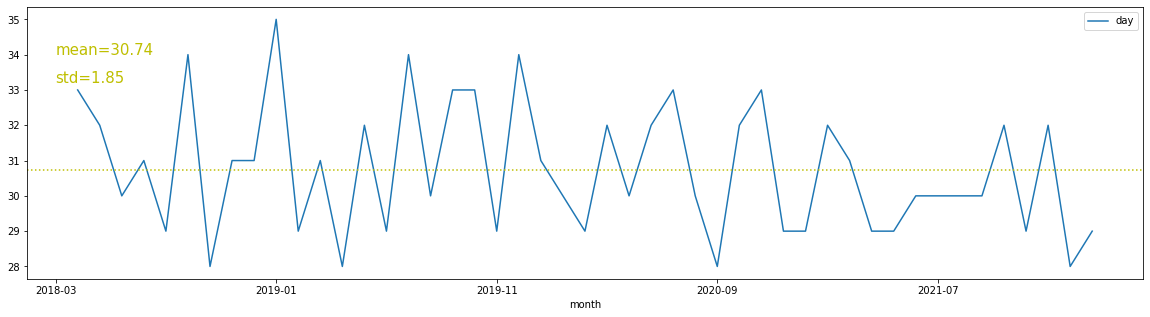

In [252]:
tm_diff_desc = tm_diff.describe()
print(tm_diff_desc)

tm_diff.plot(figsize=(20,5))
plt.axhline(y=tm_diff_desc.loc['mean'][0], color='y', ls=':')
plt.text(0,34,"mean={:.2f}".format(tm_diff_desc.loc['mean'][0]),color='y',size=15)
plt.text(0,33.2,"std={:.2f}".format(tm_diff_desc.loc['std'][0]),color='y',size=15)

累计均值

In [278]:
cmsm = tm_diff.cumsum()
cmsm['n']=range(len(tm_diff))
cmsm['ave']=cmsm['day']/cmsm['n']
cmsm

,day,n,ave
month,,,
2018-03,NaN,0,NaN
2018-04,33.0,1,33.000000
2018-05,65.0,2,32.500000
2018-06,95.0,3,31.666667
2018-07,126.0,4,31.500000
2018-08,155.0,5,31.000000
2018-09,189.0,6,31.500000
2018-10,217.0,7,31.000000
2018-11,248.0,8,31.000000


<AxesSubplot:xlabel='month'>

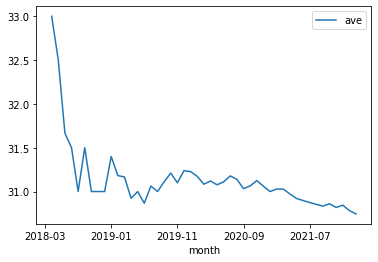

In [280]:
cmsm[['ave']].plot()